<a href="https://colab.research.google.com/github/Trieu1020/baitapAI1/blob/main/AI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 18.0 MB/s eta 0:00:00


DiscountPercent: 53.05555555555554


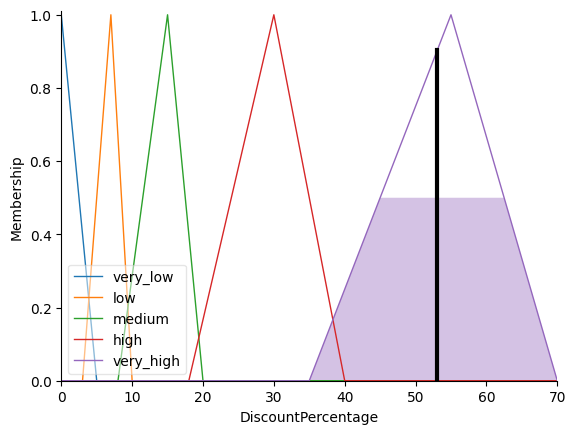

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


StoreRating = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'StoreRating')
SalesVolume = ctrl.Antecedent(np.arange(0, 101, 1), 'SalesVolume')
ProfitMargin = ctrl.Antecedent(np.arange(0, 101, 1), 'ProfitMargin')
SeasonalEvent = ctrl.Antecedent(np.arange(0, 11, 1), 'SeasonalEvent')
CompetitorDiscounts = ctrl.Antecedent(np.arange(0, 101, 1), 'CompetitorDiscounts')

DiscountPercentage = ctrl.Consequent(np.arange(0,71,1),'DiscountPercentage')

StoreRating['low'] = fuzz.trimf(StoreRating.universe, [0, 0, 4.0])
StoreRating['medium'] = fuzz.trimf(StoreRating.universe, [3.8, 4.25, 4.5])
StoreRating['high'] = fuzz.trimf(StoreRating.universe, [4.4, 5.0, 5.0])

SalesVolume['low'] = fuzz.trimf(SalesVolume.universe, [0, 0, 40])
SalesVolume['medium'] = fuzz.trimf(SalesVolume.universe, [30, 50, 70])
SalesVolume['high'] = fuzz.trimf(SalesVolume.universe, [60, 100, 100])

ProfitMargin['low'] = fuzz.trimf(ProfitMargin.universe, [0, 0, 30])
ProfitMargin['medium'] = fuzz.trimf(ProfitMargin.universe, [20, 50, 70])
ProfitMargin['high'] = fuzz.trimf(ProfitMargin.universe, [60, 100, 100])

SeasonalEvent['none'] = fuzz.trimf(SeasonalEvent.universe, [0, 0, 3])
SeasonalEvent['moderate'] = fuzz.trimf(SeasonalEvent.universe, [2, 5, 7])
SeasonalEvent['high'] = fuzz.trimf(SeasonalEvent.universe, [6, 10, 10])

CompetitorDiscounts['low'] = fuzz.trimf(CompetitorDiscounts.universe, [0, 0, 30])
CompetitorDiscounts['medium'] = fuzz.trimf(CompetitorDiscounts.universe, [20, 50, 70])
CompetitorDiscounts['high'] = fuzz.trimf(CompetitorDiscounts.universe, [60, 100, 100])

DiscountPercentage['very_low'] = fuzz.trimf(DiscountPercentage.universe, [0, 0, 5])
DiscountPercentage['low'] = fuzz.trimf(DiscountPercentage.universe, [3, 7, 10])
DiscountPercentage['medium'] = fuzz.trimf(DiscountPercentage.universe, [8, 15, 20])
DiscountPercentage['high'] = fuzz.trimf(DiscountPercentage.universe, [18, 30, 40])
DiscountPercentage['very_high'] = fuzz.trimf(DiscountPercentage.universe, [35, 55, 70])

rules = [
    ctrl.Rule(StoreRating['high'] & SalesVolume['high'] & ProfitMargin['high'],DiscountPercentage['very_low']),
    ctrl.Rule(StoreRating['low'] & SalesVolume['low'] & ProfitMargin['high'],DiscountPercentage['high']),
    ctrl.Rule(SeasonalEvent['high'] & CompetitorDiscounts['high'],DiscountPercentage['very_high']),
    ctrl.Rule(StoreRating['medium'] & SalesVolume['medium'] & ProfitMargin['medium'],DiscountPercentage['medium']),
    ctrl.Rule(CompetitorDiscounts['low'] & ProfitMargin['low'] & SalesVolume['high'],DiscountPercentage['very_low']),
    ctrl.Rule(StoreRating['low'] & SeasonalEvent['none'],DiscountPercentage['medium']),
    ctrl.Rule(SalesVolume['low'] & ProfitMargin['low'],DiscountPercentage['very_high']),
]

control_system = ctrl.ControlSystem(rules)
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['StoreRating'] = 4.3
fuzzy_system.input['SalesVolume'] = 4
fuzzy_system.input['ProfitMargin'] = 20
fuzzy_system.input['SeasonalEvent'] = 8
fuzzy_system.input['CompetitorDiscounts'] = 80

fuzzy_system.compute()

print('DiscountPercent:',fuzzy_system.output['DiscountPercentage'])
DiscountPercentage.view(sim=fuzzy_system)